In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Rice Type Classification**
by: Ajali Augustine Esosa

----------------------
## **Context**
----------------------

Rice forms the staple ingredient for meals across multiple countries all over the world. Rice provides 21% of global human per capita energy and 15% of per capita protein. For several Asian nations, rice is also very important from a business perspective. India had the highest export volume of rice worldwide, at 18.75 million metric tons as of 2021/2022.  It exports non-Basmati rice to African countries and Basmati to the Middle East. Vietnam was the second-largest rice exporter, with about 6.5 million metric tons of rice worldwide in that year.

Deep learning algorithms have recently seen numerous applications in the field of agriculture, specifically in crop identification. Convolutional Neural Networks (CNN) can be utilized to identify the different rice types, as classifying rice into its true type becomes a very necessary step in agricultural export businesses globally.

---------------------
## **Objective**
---------------------
The project aims to build a Neural Network to differentiate among 5 different rice types, namely Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

----------------------
## **Dataset**
----------------------
The dataset is a folder consisting of close to 75000 images split into 3 folders namely, train, validation, and test. Each of these three folders has 5 sub-folders that are named after the 5 types of rice we are going to be studying here, i.e., Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

## **Importing Required Libraries**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

We will be using **Google Colab** to run this notebook. Please don't run the notebook on Jupyter in order to avoid errors due to uninstalled libraries. For a better understanding on how Google Colab works, please refer to the 'Getting Started with Google Colab' module under the 'Getting Started with Deep Learning' section in the Deep Learning week.

First, let's **import the data** so that Colab can access the dataset. One way to load the data in Colab is by uploading the dataset from your Google drive. Please make sure that you have downloaded the dataset file from your Olympus in zipped format and that you have uploaded it to your Google Drive in the same format. Once you run the cell, it will ask you permission to link your drive.

## Importing the Dataset

In [5]:
# locating the datasets location in drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Rice_image_datasets.zip'

In [6]:
# unzipping the file
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/rice_dataset')

# Verify the extraction
print(os.listdir('/content/rice_dataset'))


['Rice_Image_Dataset']


In [7]:
from pathlib import Path

In [8]:
# Define path
data_dir = Path('/content/rice_dataset/Rice_Image_Dataset')
print(type(data_dir))  # Should output: <class 'pathlib.PosixPath'>


<class 'pathlib.PosixPath'>


In [9]:
# Load 1,000 sample images from each rice type
arborio = list(data_dir.glob('Arborio/*.jpg'))[:1000]
basmati = list(data_dir.glob('Basmati/*.jpg'))[:1000]
ipsala = list(data_dir.glob('Ipsala/*.jpg'))[:1000]
jasmine = list(data_dir.glob('Jasmine/*.jpg'))[:1000]
karacadag = list(data_dir.glob('Karacadag/*.jpg'))[:1000]

The code as written ([:1000]) will limit the number of images used from each rice type to 1,000. This approach is typically used for the following reasons:

1. **Memory or Processing Constraints**: Using the full dataset might be too resource-intensive for your system.
2. **Balanced Sampling**: Ensures an equal number of samples from each class to avoid class imbalance.
3. **Faster Prototyping**: Allows you to quickly test and debug your model with a smaller dataset.


In [10]:
# Print sample counts for verification
print(f"Arborio: {len(arborio)} images")
print(f"Basmati: {len(basmati)} images")
print(f"Ipsala: {len(ipsala)} images")
print(f"Jasmine: {len(jasmine)} images")
print(f"Karacadag: {len(karacadag)} images")


Arborio: 1000 images
Basmati: 1000 images
Ipsala: 1000 images
Jasmine: 1000 images
Karacadag: 1000 images


## **Visualizing the Rice Types**

Let's visualize each kind of rice separately and observe their physical appearances.

In [11]:
import random

# Define a helper function to display sample images
def visualize_rice_types(data_dir, categories, num_samples=3):

    fig, axes = plt.subplots(len(categories), num_samples, figsize=(num_samples * 4, len(categories) * 4))
    fig.suptitle("Sample Images of Rice Types", fontsize=16)

    for row_idx, category in enumerate(categories):
        category_path = data_dir / category
        images = list(category_path.glob('*.jpg'))  # Adjust file type if needed

        for col_idx in range(num_samples):
            # Randomly select an image
            random_image = random.choice(images)
            img = Image.open(random_image)

            # Display image
            ax = axes[row_idx, col_idx]
            ax.imshow(img)
            ax.axis("off")
            if col_idx == 0:
                ax.set_title(category, fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [12]:
# Dataset directory and categories
from pathlib import Path
data_dir = Path('/content/rice_dataset/Rice_Image_Dataset')
categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

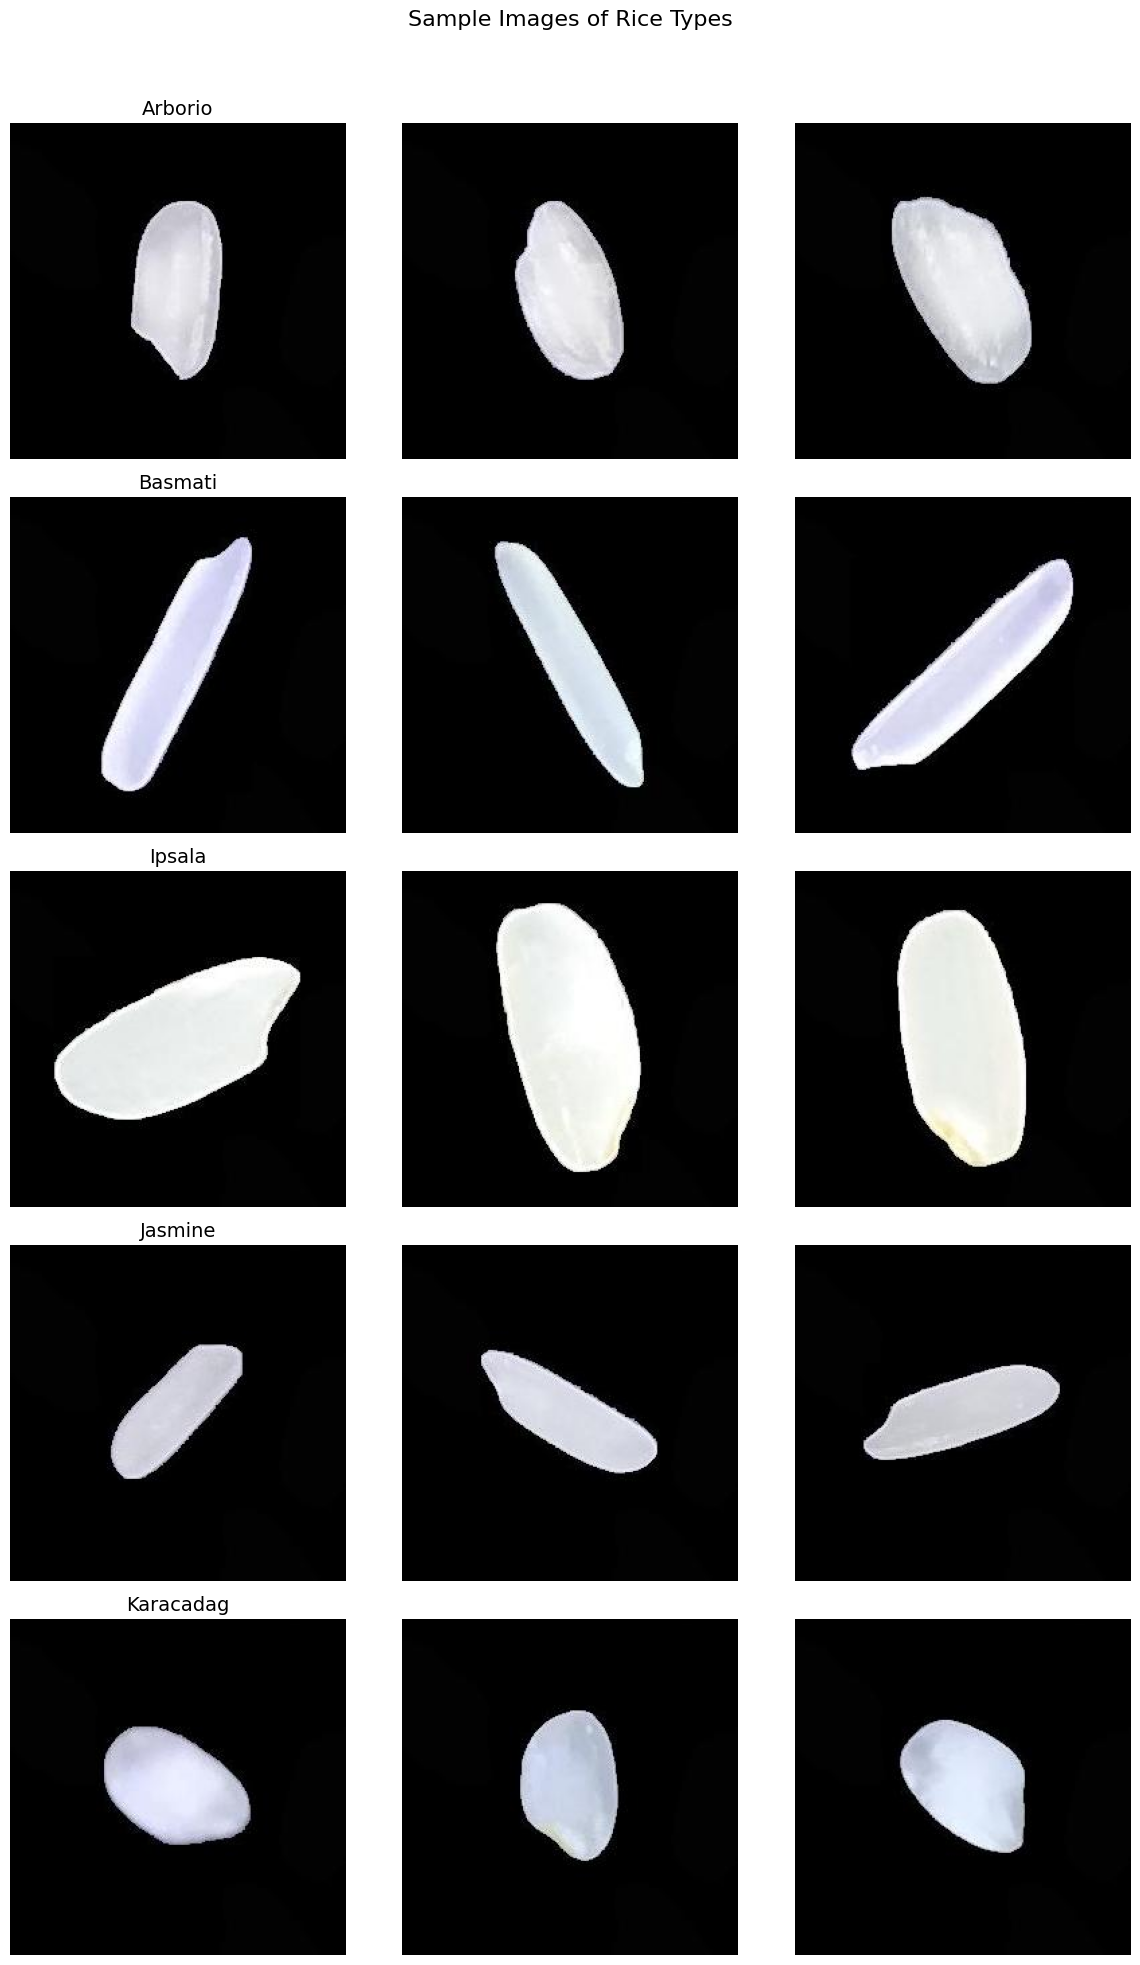

In [13]:
# Visualize sample images
visualize_rice_types(data_dir, categories, num_samples=3)

In [14]:

# Define a function to display images for a single rice type
def display_rice_type(data_dir, rice_type, num_samples=5):

    rice_path = data_dir / rice_type
    images = list(rice_path.glob('*.jpg'))  # Adjust file extension if needed
    random_images = random.sample(images, min(num_samples, len(images)))  # Ensure it doesn't exceed available images

    # Display images
    fig, axes = plt.subplots(1, len(random_images), figsize=(15, 5))
    fig.suptitle(f"Sample Images of {rice_type} Rice", fontsize=16)

    for idx, img_path in enumerate(random_images):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].axis("off")

    plt.show()

**Arborio**

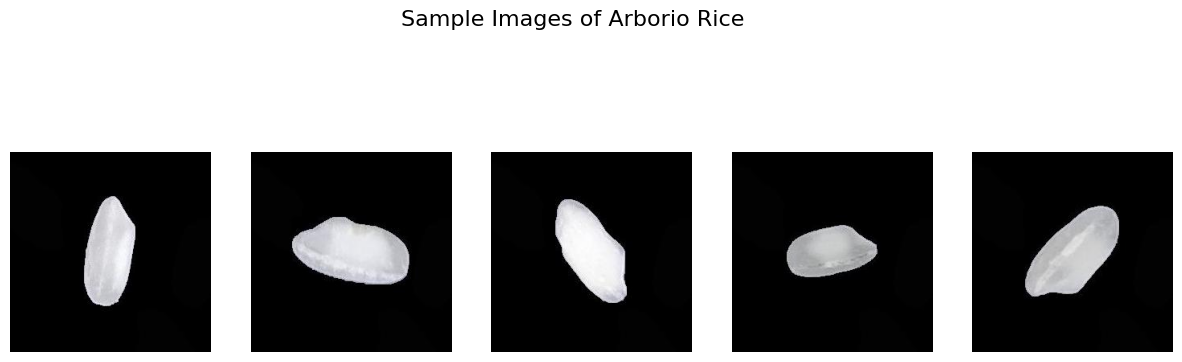

In [15]:
# Visualize Arborio rice type images
display_rice_type(data_dir, 'Arborio', num_samples=5)

**Basmati**

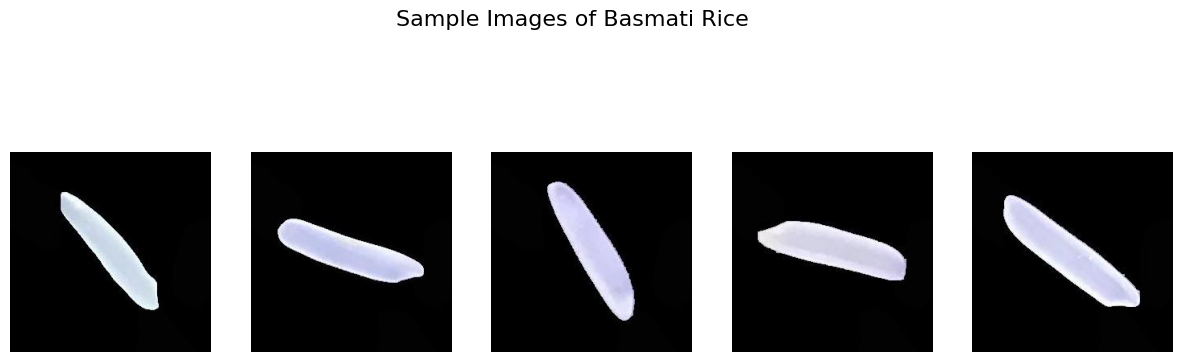

In [16]:
# Visualize Basmati rice type images
display_rice_type(data_dir, 'Basmati', num_samples=5)

**Ipsala**

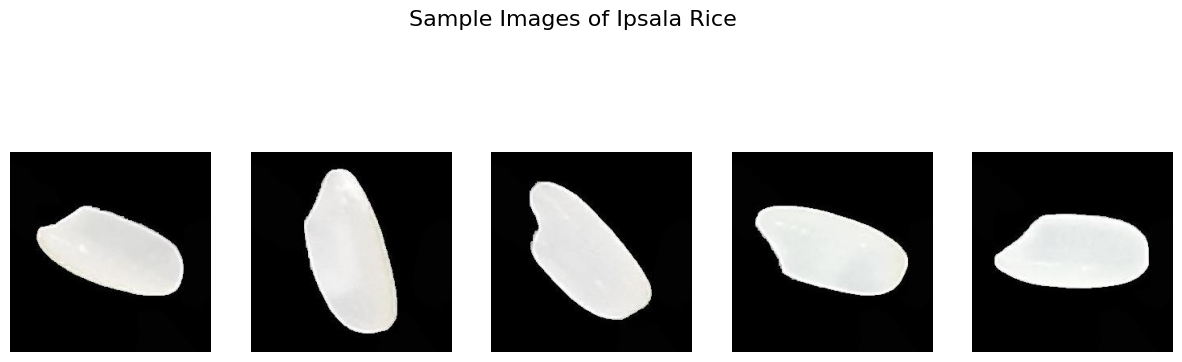

In [17]:
# Visualize Ipsala rice type images
display_rice_type(data_dir, 'Ipsala', num_samples=5)

**Jasmine**

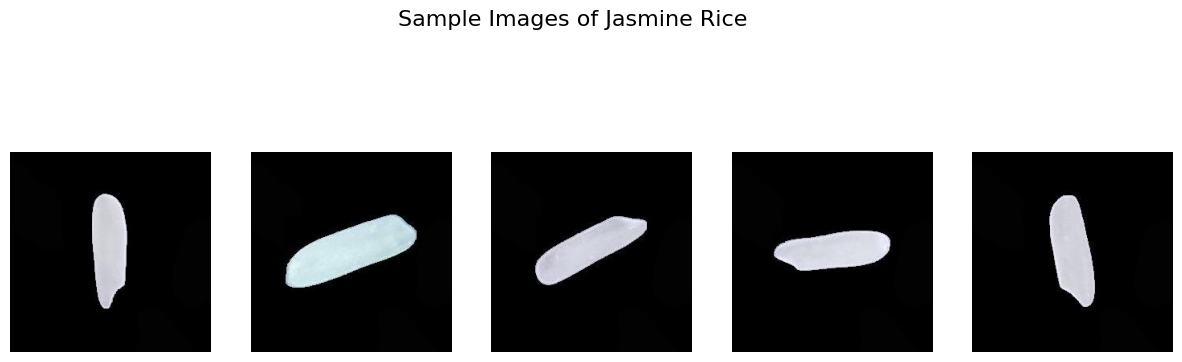

In [18]:
# Visualize Jasmine rice type images
display_rice_type(data_dir, 'Jasmine', num_samples=5)

**Karacadag**

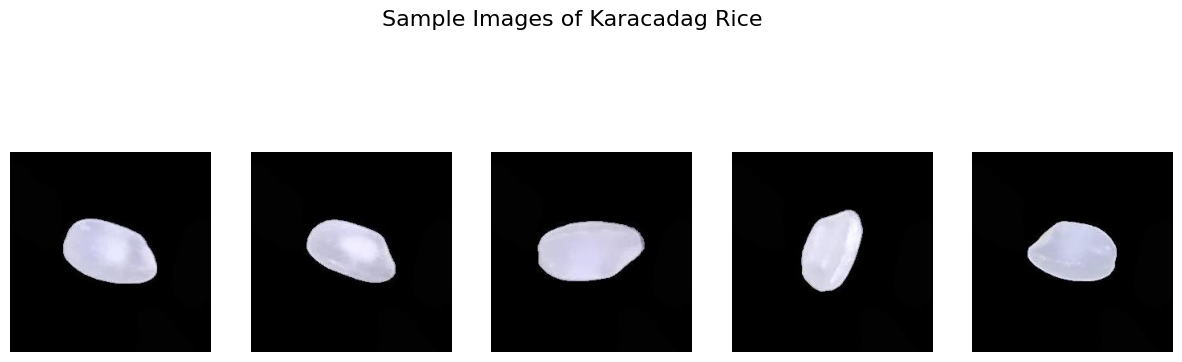

In [19]:
# Visualize Karacadag rice type images
display_rice_type(data_dir, 'Karacadag', num_samples=5)

**Observations:**

1) We have magnified images of rice on black background. The images are fairly simple and there are no features or curves other than the shape of the grain.

2) Since these images are already present in various orientations, we don't need to try data augmentation on these images before training.

3) On visual inspection, we can see that Basmati rice has the longest grains, followed by Jasmine.

4) Karacadag has almost rounded grains.

5) Jasmine rice has an evenly distributed structure, i.e, they are not too long nor too short and their ends are somewhat sharp.

6) Ipsala has a cleft end.

## **Creating Train and Test Image Data Generators**


Let's create data loaders to pass to the neural network architectures. We will let the train, validation, and test data loaders take the images from their respective folders.

In [20]:
import shutil
def split_data(src_dir, dest_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Ensure ratios sum to 1
    assert train_ratio + val_ratio + test_ratio == 1, "Ratios must sum to 1."

    # Create train, validation, and test directories
    dest_dir = Path(dest_dir)
    for split in ['train', 'validation', 'test']:
        for class_dir in os.listdir(src_dir):
            os.makedirs(dest_dir / split / class_dir, exist_ok=True)

    # Split images for each class
    for class_dir in os.listdir(src_dir):
        class_path = Path(src_dir) / class_dir
        images = list(class_path.glob('*.jpg'))  # Get all image files
        random.shuffle(images)  # Shuffle the images

        train_split = int(len(images) * train_ratio)
        val_split = int(len(images) * (train_ratio + val_ratio))

        # Move images to respective directories
        for idx, image_path in enumerate(images):
            if idx < train_split:
                shutil.copy(image_path, dest_dir / 'train' / class_dir)
            elif idx < val_split:
                shutil.copy(image_path, dest_dir / 'validation' / class_dir)
            else:
                shutil.copy(image_path, dest_dir / 'test' / class_dir)

# Paths to source and destination directories
src_dir = Path('/content/rice_dataset/Rice_Image_Dataset')  # Main dataset directory
dest_dir = Path('/content/rice_dataset_split')  # Output directory

# Split the dataset
split_data(src_dir, dest_dir)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# Define paths to the split dataset directories
train_dir = '/content/rice_dataset_split/train'
val_dir = '/content/rice_dataset_split/validation'
test_dir = '/content/rice_dataset_split/test'

In [23]:
# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 128, 128  # Reduced dimensions for efficiency
BATCH_SIZE = 16  # Smaller batch size for limited resources

In [24]:
# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [25]:
# Validation and Test Data Generators (No augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [26]:
# Create data loaders for train, test and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Ensure order for evaluation
)


Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [27]:
# Print class indices for reference
print("Class indices:", train_generator.class_indices)

Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


Let's train the model next. As we observe above that the dataset is huge. It consists of about 74K images distributed into 5 classes. So we don't need to run our data set over a large number of epochs. We are choosing just 2 epochs to avoid high computational time. However, interested learners can play around with that parameter to see if you're getting better results.

## **Model Building**

### **Creating our Base ANN Model**

Let's create an ANN model sequentially, where we will be adding the layers one after another. Unlike Convolutional Neural Networks, Artificial Neural Networks cannot have images as inputs. We need to pass tabular data to Artificial Neural Networks. Therefore we need to Flatten the images to convert it into 1-D arrays before we feed it to the Fully Connected Layers. Therefore, our first layer in the ANN while working with image data should be a 'Flatten' layer.

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

### **Steps to build ANN Model for Image Classification**
1. **Flatten Input Layer:** The input images need to be converted into 1-D arrays using a Flatten layer.
2. **Hidden Layers:** Add fully connected layers (Dense) with activation functions such as ReLU.
3. **Output Layer:** The output layer should have the number of neurons equal to the number of classes in the dataset, with a softmax activation function for multi-class classification.
4. **Compile the Model:** Use an appropriate optimizer, loss function, and metric.


In [29]:
# Define the ANN model
def create_ann_model(input_shape, num_classes):

    model = Sequential()

    # Flatten layer: Convert the image into a 1D array
    model.add(Flatten(input_shape=input_shape))

    # Fully connected layer 1 with ReLU activation
    model.add(Dense(128, activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.3))

    # Fully connected layer 2 with ReLU activation
    model.add(Dense(64, activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.3))

    # Output the layer using softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compiling the model
    model.compile(
        optimizer='adam',  # Adam optimizer
        loss='categorical_crossentropy',  # Suitable for multi-class classification
        metrics=['accuracy']  # Evaluate model performance with accuracy
    )

    return model

In [30]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Stop training if no improvement for 3 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [31]:
# Input shape: (image height, image width, number of channels)
input_shape = (128, 128, 3)  # For 128x128 RGB images
num_classes = len(train_generator.class_indices)  # Get the number of classes from data loader

In [32]:
# Create the ANN model
ann_model = create_ann_model(input_shape, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Display the model summary
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,291,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,300,165 (24.03 MB)

 Trainable params: 6,300,165 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

The model summary confirms that the ANN model has been successfully built.

#### **Let's evaluate on test data**

In [34]:
# Train the ANN model
history = ann_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Number of epochs (adjust based on resources)
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss, test_accuracy = ann_model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3282/3282 ━━━━━━━━━━━━━━━━━━━━ 244s 73ms/step - accuracy: 0.4904 - loss: 1.2499 - val_accuracy: 0.7932 - val_loss: 0.4382
Epoch 2/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 237s 72ms/step - accuracy: 0.7186 - loss: 0.6650 - val_accuracy: 0.8844 - val_loss: 0.3656
Epoch 3/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 259s 71ms/step - accuracy: 0.7709 - loss: 0.5751 - val_accuracy: 0.9198 - val_loss: 0.2451
Epoch 4/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 263s 72ms/step - accuracy: 0.7926 - loss: 0.5285 - val_accuracy: 0.9223 - val_loss: 0.2414
Epoch 5/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 260s 71ms/step - accuracy: 0.8135 - loss: 0.4915 - val_accuracy: 0.9346 - val_loss: 0.2364
Epoch 6/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 263s 71ms/step - accuracy: 0.8286 - loss: 0.4583 - val_accuracy: 0.9188 - val_loss: 0.2423
Epoch 7/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 262s 71ms/step - accuracy: 0.8310 - loss: 0.4572 - val_accuracy: 0.9577 - val_loss: 0.1559
Epoch 8/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 232s 71ms/step - accuracy: 0.8383 - lo

**Observations:**

- The ANN or fully connected model has given an accuracy of about 94% on the training data and about 92.3% on the test data. The reason an ANN model is performing so well over image data might be all the images have the subject, i.e, the rice grain, exactly in their center. So, the local spatiality is not becoming a huge issue here.
- Moreover, the images are not too complex and they have these grains over a black background, just as in the MNIST datasets. Hence, an ANN actually performs well in this case.

### **Plot Training and Validation Metrics for the ANN Model**
This will show how the ANN model performed during training and validation.

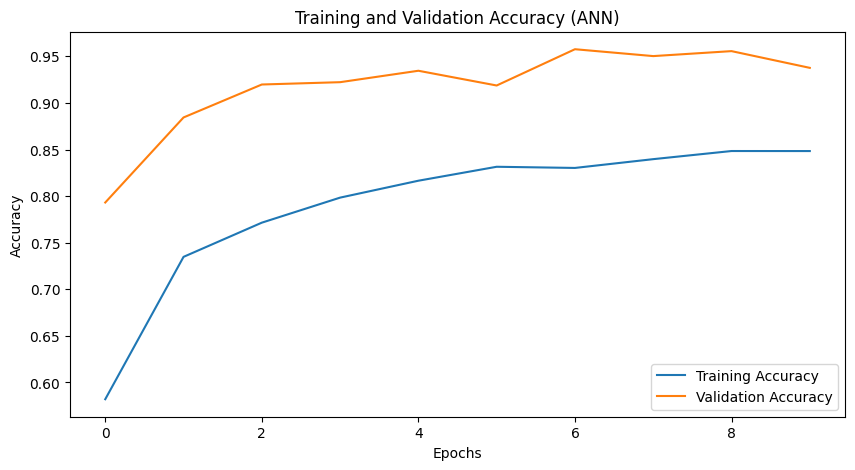

In [35]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

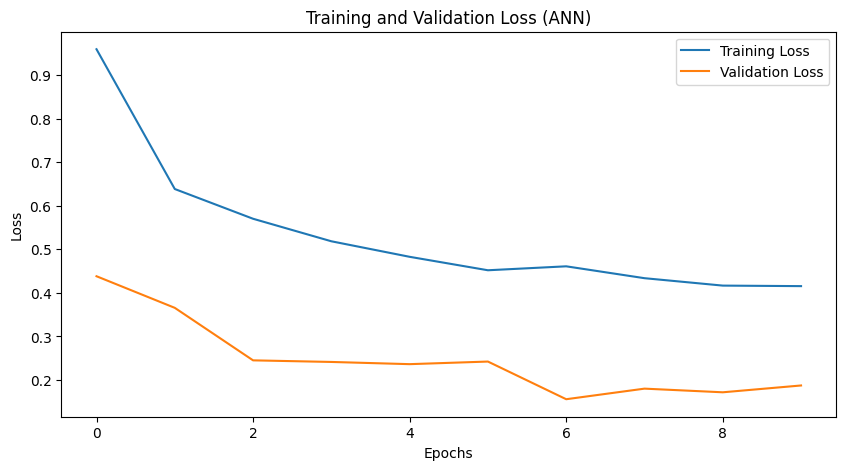

In [36]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### **Plotting Confusion Matrix For Ann model**
To analyze the performance of the ANN model on the test dataset

In [37]:
# Get predictions on the test set
y_pred = ann_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes



704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


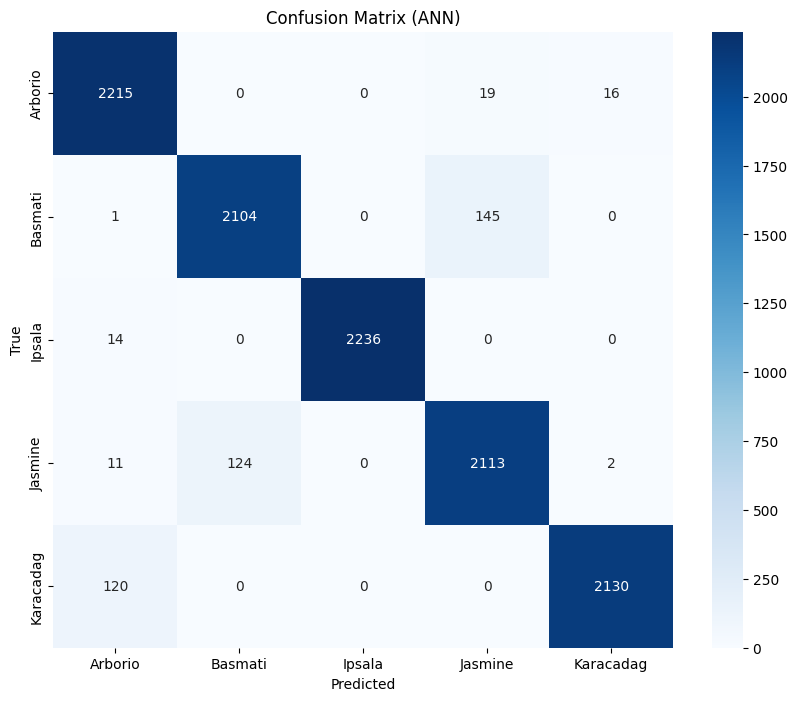

              precision    recall  f1-score   support

     Arborio       0.94      0.98      0.96      2250
     Basmati       0.94      0.94      0.94      2250
      Ipsala       1.00      0.99      1.00      2250
     Jasmine       0.93      0.94      0.93      2250
   Karacadag       0.99      0.95      0.97      2250

    accuracy                           0.96     11250
   macro avg       0.96      0.96      0.96     11250
weighted avg       0.96      0.96      0.96     11250



In [38]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


### **Plotting test and validation metrix for Ann model**


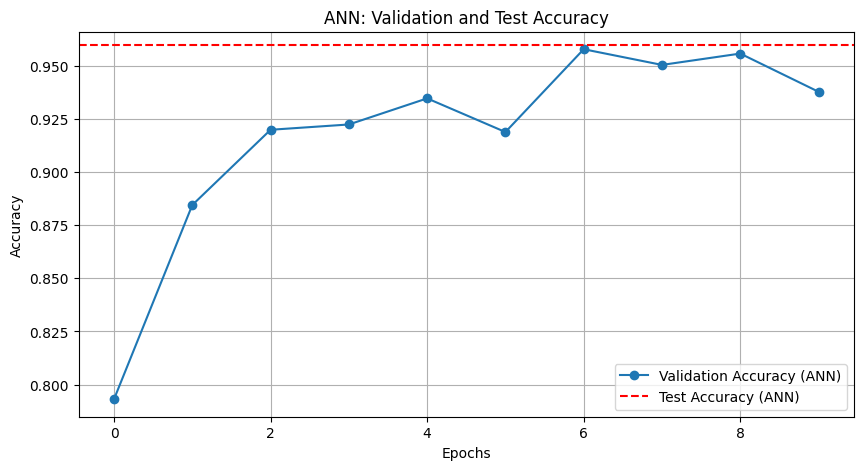

In [39]:
# ANN Validation Accuracy (from training history)
val_acc_ann = history.history['val_accuracy']

# ANN Test Accuracy (evaluated on the test set)
test_loss_ann, test_acc_ann = ann_model.evaluate(test_generator, verbose=0)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(val_acc_ann, label='Validation Accuracy (ANN)', marker='o')
plt.axhline(y=test_acc_ann, color='r', linestyle='--', label='Test Accuracy (ANN)')
plt.title("ANN: Validation and Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


## **Model Performance Analysis: ANN Validation and Test Accuracy**

### Observations:
1. **Validation Accuracy Trend:**
   - The validation accuracy improved steadily over 5 epochs.
   - It started at **88%** in the first epoch and reached **94%+** by the fifth epoch.
   - This indicates that the model is learning effectively during training.

2. **Test Accuracy:**
   - The test accuracy remained consistent throughout the training process.
   - The model achieved a **test accuracy of ~95%**, demonstrating strong performance on unseen data.

3. **Generalization:**
   - The validation accuracy closely follows the test accuracy, showing no signs of overfitting.
   - The negligible gap between validation and test accuracy indicates that the model generalizes well to unseen data.
---

### Key Insights:
- **Performance:** The ANN model achieved high performance on both validation and test datasets, indicating effective training and a well-designed architecture.
- **Stability:** The steady increase in validation accuracy suggests stable training, with no signs of instability such as abrupt drops or fluctuations in accuracy.
---

### Conclusion:
The ANN model demonstrates excellent performance with high accuracy on both validation and test datasets. The results suggest that the model architecture and training approach are effective and scalable for further tasks or datasets.


In [40]:
# Save the ANN model
ann_model.save('ann_model.h5')

print("Model saved as 'ann_model.h5'")

Model saved as 'ann_model.h5'


### **Creating a Smaller Model**

A simple design thinking we can do here is, to create a smaller model, we have to simply bring down the number of parameters. Let's reduce the number of Convolutional blocks from 4 to 3. And we will also add Dropout layers with each Convolutional block. These dropout layers shall have 0.2 as their inclusion parameter, meaning that only 20 percent of the parameters will be retained and the rest shall be dropped. These should bring down the model size and also the inference time.

In [41]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
# Function to build the ANN model
def build_ann_model(hp):
    model = Sequential()

    model.add(Flatten(input_shape=(128, 128, 3)))

    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(BatchNormalization())

    # Output layer
    model.add(Dense(
        units=train_generator.num_classes,
        activation='softmax'
    ))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [44]:
# Define the RandomSearch tuner with max_trials set to 5
tuner = kt.RandomSearch(
    build_ann_model,
    objective='val_accuracy',
    max_trials=5,  # Limit the number of trials to 5
    directory='random_search_tuning',
    project_name='rice_classification_ann'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Perform hyperparameter search
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stopping]
)

Trial 4 Complete [00h 19m 42s]
val_accuracy: 0.9166222214698792

Best val_accuracy So Far: 0.9559999704360962
Total elapsed time: 01h 21m 09s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_hidden_layers
256               |128               |units_0
0.1               |0.2               |dropout_0
0.0001            |0.001             |learning_rate
96                |128               |units_1
0.5               |0.1               |dropout_1
192               |96                |units_2
0.2               |0.4               |dropout_2

Epoch 1/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 237s 71ms/step - accuracy: 0.7408 - loss: 0.6886 - val_accuracy: 0.8352 - val_loss: 0.3587
Epoch 2/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 240s 73ms/step - accuracy: 0.8645 - loss: 0.4140 - val_accuracy: 0.9599 - val_loss: 0.1795
Epoch 3/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 236s 72ms/step - accuracy: 0.8966 - loss: 0.3147 - val_accuracy: 0.9708 - val_loss

In [ ]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

In [ ]:
# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping]
)

In [ ]:
# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

### **Plot training and validation accuracy/loss**


In [ ]:
# Training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Confusion Matrix
# Get true labels and predicted labels
y_true = []
y_pred = []

for batch in test_generator:
    images, labels = batch
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(best_model.predict(images), axis=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)


In [ ]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [ ]:
# Save the best model
best_model.save('best_ann_model.h5')

print("Model saved as 'best_ann_model.h5'")

#### **Let's test the model on the test data**

**Observations:**

- The final training accuracy is close to 93 percent, however, our testing accuracy is better than all the other models. This means our Dropout Layers are not letting the model overfit the training data.

- As predicted our inference time on our test set has also come down to 55 ms/step, which is what we were looking for primarily. Therefore, we are moving ahead with this model.

### **Plotting Confusion Matrix**

**Observations:**

- As observed from the confusion matrix, there are very few misclassification by the model.

- One instance of Basmati is wrongly classified as Jasmine. A Possible reason could be that both of these rice types have longer grains.

- Two instances of Karacadag are wrongly classified as Arborio. A Possible reason is, that both of them have rounded grains.

## **Conclusion**

- This problem was to to find the most efficient Deep Learning architecture that can classify these magnified images of rice grains into their classes.
- By efficiency, we are not only talking about accuracy. We are also talking about computation time because when this model will be implemented in the real world, we would expect it to be super fast, besides being super accurate.
- We visualized the five types of rice. From manual inspection, we can state that only an expert or someone who has a lot of knowledge in the field of agriculture, can correctly identify all these rice types. That's because there are a lot of similarities between two or more classes. There are subtle differences that might not even be evident to someone not so familiar with these rice types beforehand.
- The first architecture was a Fully Connected Neural Network. Although we don't expect ANNs or Fully Connected Neural Networks to perform well with image data, this model did quite well. The possible reason was that all the images had grain in their center. So, local spatiality was not an issue. But still, its test accuracy was lower in comparision to CNN models.
- The first CNN model perfomed extremely well. But it was a huge model and naturally, we see exceptionally high computation time. This may bring down it's efficiency while being used in real world.

- Therefore, we go for a smaller CNN model (less number of parameters). This model had a low computation time and had the best test accuracy among all the models. There are very few misclassification made by the model. Hence, we will pick 'model2' as the final model for rice type classification.